In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import svm

In [11]:
all_df = pd.read_csv("data/star.csv")

In [12]:
X=all_df.drop(['target_class'], axis=1).values.astype('float64')

In [13]:
Y = all_df['target_class'].values.astype('int64')

In [14]:
X = StandardScaler().fit_transform(X)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=None) 
Xtrain[:2]

array([[-2.33143696, -0.52243576,  2.57315737,  1.43806994,  1.42536661,
         2.35148583, -1.58125579, -0.98248589],
       [ 0.40924946, -1.51266459, -0.50054995,  0.02417183,  0.25309311,
         1.40230608, -1.26268148, -0.93238749]])

In [15]:
Ytrain[:2]

array([1, 0])

In [16]:
Y[:2]

array([0, 0])

In [17]:
C = 5.0
classifiers = {
               'RF5': RandomForestClassifier(n_estimators=5),
               'RF50': RandomForestClassifier(n_estimators=50),                
               'tree':DecisionTreeClassifier(criterion='gini',max_depth=5),
                'SVM':svm.SVC(C=5.0,random_state=0, kernel='rbf' ,probability=True)
              }

plt.figure(figsize=(8,8))
n_classifiers = len(classifiers)

For model RF5 accuracy = 0.9768156424581006
For model RF50 accuracy = 0.9787709497206704
For model tree accuracy = 0.975977653631285


/home/bruce/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For model SVM accuracy = 0.9770949720670391


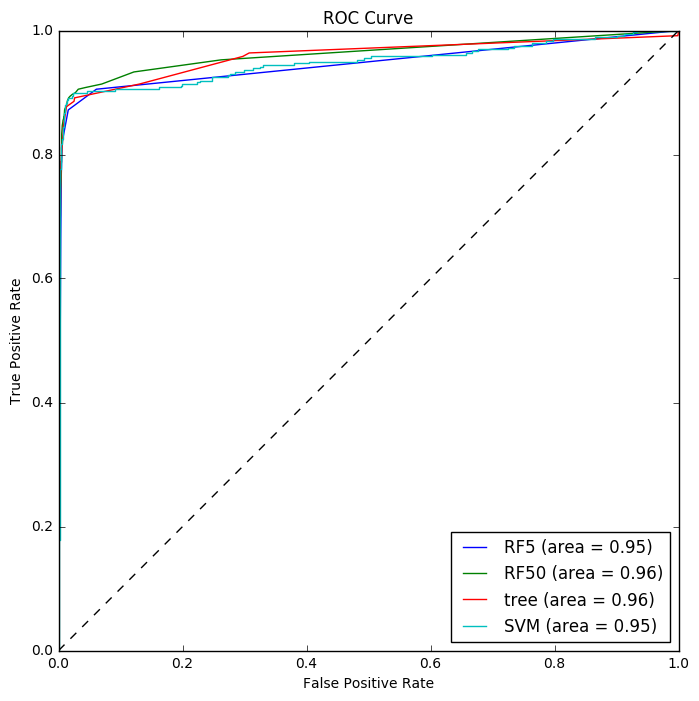

In [18]:
for index, (name, clf) in enumerate(classifiers.items()):
    clf.fit(Xtrain, Ytrain)
    probs = clf.predict_proba(Xtest)
    fpr, tpr, thresholds = roc_curve(Ytest, probs[:, 1])
    roc_auc = auc(fpr, tpr)
    print ('For model', name, 'accuracy =', clf.score(Xtest,Ytest))
    plt.plot(fpr, tpr, label='%s (area = %0.2f)' % (name, roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()